# Grundlagen der Numerik

## Lernziele

1. Sie kennen die unterschiedlichen Fehlerarten, welche in der Numerik zum Tragen kommen.
2. Sie kennen Differenzenquotienten zur Approximation von Ableitungen unterschiedlicher Ordnung.
3. Sie können die Fehlerordnung eines Differenzenquotienten experimentell und analytisch bestimmen.
4. Sie können die optimale Schrittweite eines Differenzenquotienten experimentell bestimmen.

## Theorie

**Differenzenquotienten zur Approximation von Ableitungen**  

Bei der numerischen Ableitung einer Funktion $f(x)=y$ an eienr Stelle $x_0 \in D_f$ wird der Grenzwert

$$f'(x_0)=\lim\limits_{h \rightarrow 0} \frac{f(x_0+h)-f(x_0)}{h}$$

durch die Sekantensteigung ersetzt

$$f'(x_0) \approx \frac{f(x_0+h)-f(x_0)}{h}$$

$h>0$ nennen wir die Schrittweite. 

Wir bestimmen die Fehlerordnung des mathematischen Verfahrens mit Hilfe der Taylorreihenentwicklung von $f$:

$$f(x_0+h) = f(x_0) + f'(x_0)h + \frac{f''(x_0)}{2}h^2 + \frac{f^{(3)}(x_0)}{6}h^3 + {\cal O}(h^4)$$

Durch Umformen dieser Gleichung erhalten wir  

$$\frac{f(x_0+h)-f(x_0)}{h} - f'(x_0) = \frac{f''(x_0)}{2}h + \frac{f^{(3)}(x_0)}{6}h^2 + {\cal O}(h^3) = {\cal O}(h)$$

Somit hat der Vorwärts-Differenzenquotient $\displaystyle{\Delta_{h\rightarrow}^1=\frac{f(x_0+h)-f(x_0)}{h}}$ die Fehlerordnung 1, d.h. der Fehler hängt linear von der Schrittweite ab.  

Weitere Differenzenquotienten für die Approximation der ersten Ableitung sind  

- Rückwärts-Differenzenquotient: $\displaystyle{\Delta_{h\leftarrow}^1=\frac{f(x_0)-f(x_0-h)}{h}}$ mit Fehlerordnung 1 und  
- zentraler Differenzenquotient: $\displaystyle{\Delta_{2h}^1=\frac{f(x_0+h)-f(x_0-h)}{2h}}$ mit Fehlerordnung 2.  

Das folgende Beispiel zeigt, dass neben dem Verfahrensfehler eine **weitere Fehlerart** zu berücksichtigen ist:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Wir betrachten die Funktion
$$f(x) = \cos(x)$$

In [2]:
def f(x):
    return np.cos(x)

im Punkt
$$x_0=1.$$

In [3]:
x0 = 1

Wir berechnen nun die Differenzenquotienten mit unterschiedlichen Schrittweiten:

In [4]:
# exakter Wert der Ableitung
y = -np.sin(1)

DeltaRechts = []
DeltaLinks = []
DeltaZentral = []
Hs = 10.**np.arange(-20,-1) # logarithmische Schrittweite

for h in Hs:
    # Fehler des rechtsseitigen Differenzenquotient
    DeltaRechts.append(np.abs(y-(f(x0+h)-f(x0))/h))
    
    # Fehler des linksseitigen Differenzenquotient
    DeltaLinks.append(np.abs(y-(f(x0)-f(x0-h))/h))
    
    # Fehler des zentralen Differenzenquotient
    DeltaZentral.append(np.abs(y-(f(x0+h)-f(x0-h))/(2*h)))
    

# Berechnung ohne For-Schleife, direkt mit Eingabe des Arrays    
# Fehler des rechtsseitigen Differenzenquotient
DeltaRechts=(np.abs(y-(f(x0+Hs)-f(x0))/Hs))
    
# Fehler des linksseitigen Differenzenquotient
DeltaLinks=(np.abs(y-(f(x0)-f(x0-Hs))/Hs))
    
# Fehler des zentralen Differenzenquotient
DeltaZentral=(np.abs(y-(f(x0+Hs)-f(x0-Hs))/(2*Hs)))

Für die Analyse betrachten die Logarithmische Darstellung:

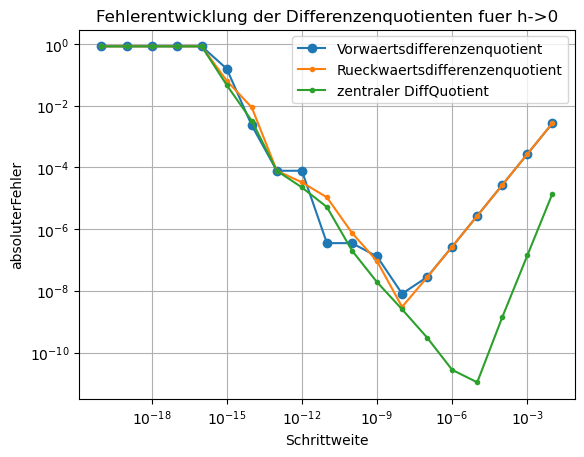

In [5]:
plt.loglog(Hs,DeltaRechts,'o-',label='Vorwaertsdifferenzenquotient')
# die beiden folgenden Zeilen können Sie nach dem Implementieren
# der weiteren Differenzenquotienten aktivieren
plt.loglog(Hs,DeltaLinks,'.-',label='Rueckwaertsdifferenzenquotient')
plt.loglog(Hs,DeltaZentral,'.-',label='zentraler DiffQuotient')
plt.xlabel('Schrittweite')
plt.ylabel('absoluterFehler')
plt.title('Fehlerentwicklung der Differenzenquotienten fuer h->0')
plt.legend()
plt.grid()
plt.show()

## Auftr&auml;ge

1. Analysieren Sie das Ergebnisse des obigen Beispiels. Welche Fehlerarten sind hier zu beobachten? Was folgern Sie daraus?

2. Implementieren Sie die Berechnung des Rueckwaerts- und zentralen Differenzenquotienten.

3. Leiten Sie mit Hilfe der Taylorreihe die Fehlerordnung für den zentralen Differenzenquotienten her (analog zur Einführung). 

4. Effiziente Programmierung in Skript-Sprachen: Wie könnte man die obige for-Schleife vermeiden?

1. - Rundungsfehler
   - Verfahrensfehler: Je nach dem von welcher Seite aus man den Differenzenquotient berechnet
   - Datenfehler: Funktionen wie die Cosinusfunktion sind in numpy nur näherungsweise genau hinterlegt. 
   
  Schlussfolgerung: Numerische Methoden müssen immer sorgfältig ausgewählt werden um Fehler zu minimieren. Für grössere Schrittweiten (rechts) nimmt der Fehler des zentralen Differenzenquotienten schneller ab. Bei kleineren Schrittweiten (links) verhalten sich alle Methoden ähnlich, der Fehler wird grösser wenn das h zu klein gewählt wird.


3. Herleitung der Fehlerordnung für den zentralen Differenzenquotienten:

Kombination der Taylorreihe von vor- und rückwärts-Differenzenquotient:
$$f(x_0+h)-f(x_0-h) = f'(x_0)h - f'(x_0)h + \frac{f''(x_0)}{2}h^2 + \frac{f''(x_0)}{2}-h^2 = 2 \frac{f''(x_0)}{2}h^2$$

Der linear von h abhängige Teil wird eliminiert, es bleibt nur noch der quadratisch und höher von h abhängige Teil übrig.
Somit hat der zentrale Differenzenquotient die Fehlerordnung 2, der weist eine quadratische Konvergenz auf.

4. Das ganze Array in die Fehlerberechnungen hineingeben, anstelle mit einer for-Schleife durch das Array durchzugehen.

## Abgabe


Bitte geben Sie Ihre Lösungen bis spätestens vor dem nächsten Praktikum 2 ab.